In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from  tensorflow.keras.datasets import mnist

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '6'

In [4]:
data = mnist.load_data(path='mnist.npz')

In [5]:
x_data = data[0][0][:,:,:,np.newaxis]
y_data = data[0][1]
x_test = data[1][0][:,:,:,np.newaxis]
y_test = data[1][1]

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.33, random_state=42, stratify=y_data)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((40200, 28, 28, 1),
 (40200, 10),
 (19800, 28, 28, 1),
 (19800, 10),
 (10000, 28, 28, 1),
 (10000, 10))

In [7]:
y_list = np.unique(data[1][1])
y_list

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
input_shape = x_test[0].shape
output_size = y_list.shape[0]

In [9]:
def build_2d_cnn_custom_ch_16_DO(conv_num=1):
    input_layer = Input(shape=input_shape)
    x = input_layer

    for i in range(conv_num):
        x = Conv2D(kernel_size=3, filters=16*(2**(i//2)), strides=(1,1), padding='same')(x)
#         x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size=2, strides=(2,2), padding='same')(x)

    x = Flatten()(x)
  
    x = Dropout(0.5)(x)
    output_layer = Dense(output_size, activation='softmax')(x)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    
    return model

In [10]:
for i in range(1, 6):
    model = build_2d_cnn_custom_ch_16_DO(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dropout (Dropout)    

Train on 40200 samples, validate on 19800 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
40128/40200 [============================>.] - ETA: 0s - loss: 7.2609 - acc: 0.4919
Epoch 00001: val_loss improved from inf to 2.25284, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_1_conv_checkpoint/001-2.2528.hdf5
40200/40200 [==============================] - 6s 144us/sample - loss: 7.2530 - acc: 0.4924 - val_loss: 2.2528 - val_acc: 0.8170
Epoch 2/500
39872/40200 [============================>.] - ETA: 0s - loss: 3.0318 - acc: 0.7680
Epoch 00002: val_loss improved from 2.25284 to 1.37876, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_1_conv_checkpoint/002-1.3788.hdf5
40200/40200 [==============================] - 4s 98us/sample - loss: 3.0238 - acc: 0.7685 - val_loss: 1.3788 - val_acc: 0.8865
Epoch 3/500
39744/40200 [============================>.] - ETA: 0s - loss: 2.0791 - acc: 0.8331
Epoch 00003: val_loss improved from 1.37876 to 

Epoch 22/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.1445 - acc: 0.9606
Epoch 00022: val_loss improved from 0.10547 to 0.09968, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_1_conv_checkpoint/022-0.0997.hdf5
40200/40200 [==============================] - 4s 95us/sample - loss: 0.1446 - acc: 0.9605 - val_loss: 0.0997 - val_acc: 0.9725
Epoch 23/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.1343 - acc: 0.9616
Epoch 00023: val_loss improved from 0.09968 to 0.09706, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_1_conv_checkpoint/023-0.0971.hdf5
40200/40200 [==============================] - 3s 86us/sample - loss: 0.1345 - acc: 0.9616 - val_loss: 0.0971 - val_acc: 0.9744
Epoch 24/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.1245 - acc: 0.9650
Epoch 00024: val_loss improved from 0.09706 to 0.09445, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_1_conv_checkpoin

39936/40200 [============================>.] - ETA: 0s - loss: 0.0667 - acc: 0.9781
Epoch 00045: val_loss did not improve from 0.07298
40200/40200 [==============================] - 4s 98us/sample - loss: 0.0672 - acc: 0.9780 - val_loss: 0.0736 - val_acc: 0.9798
Epoch 46/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0670 - acc: 0.9782
Epoch 00046: val_loss did not improve from 0.07298
40200/40200 [==============================] - 4s 93us/sample - loss: 0.0672 - acc: 0.9781 - val_loss: 0.0742 - val_acc: 0.9796
Epoch 47/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.0682 - acc: 0.9779
Epoch 00047: val_loss improved from 0.07298 to 0.07278, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_1_conv_checkpoint/047-0.0728.hdf5
40200/40200 [==============================] - 4s 98us/sample - loss: 0.0683 - acc: 0.9778 - val_loss: 0.0728 - val_acc: 0.9804
Epoch 48/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0

Epoch 73/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0581 - acc: 0.9809
Epoch 00073: val_loss did not improve from 0.07033
40200/40200 [==============================] - 4s 95us/sample - loss: 0.0581 - acc: 0.9809 - val_loss: 0.0714 - val_acc: 0.9805
Epoch 74/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0566 - acc: 0.9814
Epoch 00074: val_loss did not improve from 0.07033
40200/40200 [==============================] - 4s 95us/sample - loss: 0.0565 - acc: 0.9814 - val_loss: 0.0712 - val_acc: 0.9808
Epoch 75/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0590 - acc: 0.9801
Epoch 00075: val_loss did not improve from 0.07033
40200/40200 [==============================] - 4s 94us/sample - loss: 0.0590 - acc: 0.9801 - val_loss: 0.0708 - val_acc: 0.9806
Epoch 76/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0546 - acc: 0.9816
Epoch 00076: val_loss did not improve from 0.07033
40200/40200 [===========

40064/40200 [============================>.] - ETA: 0s - loss: 0.0503 - acc: 0.9833
Epoch 00101: val_loss did not improve from 0.06812
40200/40200 [==============================] - 4s 96us/sample - loss: 0.0502 - acc: 0.9834 - val_loss: 0.0688 - val_acc: 0.9821
Epoch 102/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0540 - acc: 0.9827
Epoch 00102: val_loss did not improve from 0.06812
40200/40200 [==============================] - 4s 94us/sample - loss: 0.0541 - acc: 0.9827 - val_loss: 0.0698 - val_acc: 0.9817
Epoch 103/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0512 - acc: 0.9828
Epoch 00103: val_loss did not improve from 0.06812
40200/40200 [==============================] - 4s 95us/sample - loss: 0.0512 - acc: 0.9828 - val_loss: 0.0686 - val_acc: 0.9818
Epoch 104/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.0501 - acc: 0.9831
Epoch 00104: val_loss improved from 0.06812 to 0.06802, saving model to model/checkpo

40000/40200 [============================>.] - ETA: 0s - loss: 0.0452 - acc: 0.9854
Epoch 00130: val_loss did not improve from 0.06802
40200/40200 [==============================] - 4s 95us/sample - loss: 0.0453 - acc: 0.9853 - val_loss: 0.0689 - val_acc: 0.9819
Epoch 131/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0459 - acc: 0.9846
Epoch 00131: val_loss did not improve from 0.06802
40200/40200 [==============================] - 4s 96us/sample - loss: 0.0459 - acc: 0.9847 - val_loss: 0.0681 - val_acc: 0.9820
Epoch 132/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0477 - acc: 0.9836
Epoch 00132: val_loss did not improve from 0.06802
40200/40200 [==============================] - 4s 97us/sample - loss: 0.0477 - acc: 0.9837 - val_loss: 0.0686 - val_acc: 0.9824
Epoch 133/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0476 - acc: 0.9835
Epoch 00133: val_loss did not improve from 0.06802
40200/40200 [=====================

40000/40200 [============================>.] - ETA: 0s - loss: 0.0466 - acc: 0.9851
Epoch 00159: val_loss improved from 0.06722 to 0.06683, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_1_conv_checkpoint/159-0.0668.hdf5
40200/40200 [==============================] - 4s 94us/sample - loss: 0.0468 - acc: 0.9850 - val_loss: 0.0668 - val_acc: 0.9823
Epoch 160/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.0463 - acc: 0.9843
Epoch 00160: val_loss did not improve from 0.06683
40200/40200 [==============================] - 4s 94us/sample - loss: 0.0462 - acc: 0.9844 - val_loss: 0.0683 - val_acc: 0.9822
Epoch 161/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.0445 - acc: 0.9853
Epoch 00161: val_loss did not improve from 0.06683
40200/40200 [==============================] - 4s 94us/sample - loss: 0.0445 - acc: 0.9853 - val_loss: 0.0672 - val_acc: 0.9826
Epoch 162/500
40192/40200 [============================>.] - ETA: 0s - loss: 

Epoch 188/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0429 - acc: 0.9856
Epoch 00188: val_loss did not improve from 0.06492
40200/40200 [==============================] - 3s 82us/sample - loss: 0.0428 - acc: 0.9856 - val_loss: 0.0692 - val_acc: 0.9821
Epoch 189/500
39552/40200 [============================>.] - ETA: 0s - loss: 0.0431 - acc: 0.9855
Epoch 00189: val_loss did not improve from 0.06492
40200/40200 [==============================] - 4s 92us/sample - loss: 0.0432 - acc: 0.9855 - val_loss: 0.0701 - val_acc: 0.9818
Epoch 190/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0426 - acc: 0.9854
Epoch 00190: val_loss did not improve from 0.06492
40200/40200 [==============================] - 4s 93us/sample - loss: 0.0426 - acc: 0.9854 - val_loss: 0.0683 - val_acc: 0.9823
Epoch 191/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.0426 - acc: 0.9859
Epoch 00191: val_loss did not improve from 0.06492
40200/40200 [=======

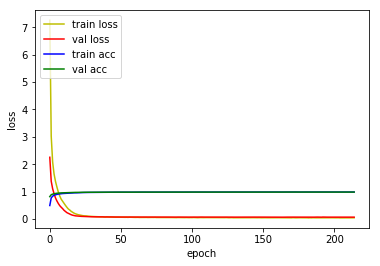

10000/10000 [==============================] - 1s 76us/sample - loss: 0.0694 - acc: 0.9835
Loss: 0.06943656803121558 Accuracy: 0.9835

Train on 40200 samples, validate on 19800 samples
Epoch 1/500
40000/40200 [============================>.] - ETA: 0s - loss: 9.7664 - acc: 0.2980
Epoch 00001: val_loss improved from inf to 2.20813, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_2_conv_checkpoint/001-2.2081.hdf5
40200/40200 [==============================] - 5s 135us/sample - loss: 9.7463 - acc: 0.2988 - val_loss: 2.2081 - val_acc: 0.7166
Epoch 2/500
39744/40200 [============================>.] - ETA: 0s - loss: 2.6650 - acc: 0.5979
Epoch 00002: val_loss improved from 2.20813 to 0.61356, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_2_conv_checkpoint/002-0.6136.hdf5
40200/40200 [==============================] - 5s 116us/sample - loss: 2.6513 - acc: 0.5981 - val_loss: 0.6136 - val_acc: 0.8134
Epoch 3/500
40064/40200 [============================>.

Epoch 22/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.1194 - acc: 0.9619
Epoch 00022: val_loss improved from 0.06835 to 0.06569, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_2_conv_checkpoint/022-0.0657.hdf5
40200/40200 [==============================] - 4s 112us/sample - loss: 0.1192 - acc: 0.9621 - val_loss: 0.0657 - val_acc: 0.9802
Epoch 23/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.1186 - acc: 0.9625
Epoch 00023: val_loss improved from 0.06569 to 0.06326, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_2_conv_checkpoint/023-0.0633.hdf5
40200/40200 [==============================] - 5s 115us/sample - loss: 0.1185 - acc: 0.9625 - val_loss: 0.0633 - val_acc: 0.9805
Epoch 24/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.1140 - acc: 0.9631
Epoch 00024: val_loss did not improve from 0.06326
40200/40200 [==============================] - 5s 113us/sample - loss: 0.1139 - acc: 0

Epoch 46/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0705 - acc: 0.9772
Epoch 00046: val_loss did not improve from 0.04701
40200/40200 [==============================] - 4s 109us/sample - loss: 0.0704 - acc: 0.9772 - val_loss: 0.0473 - val_acc: 0.9859
Epoch 47/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0733 - acc: 0.9767
Epoch 00047: val_loss improved from 0.04701 to 0.04667, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_2_conv_checkpoint/047-0.0467.hdf5
40200/40200 [==============================] - 4s 111us/sample - loss: 0.0731 - acc: 0.9767 - val_loss: 0.0467 - val_acc: 0.9859
Epoch 48/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0718 - acc: 0.9764
Epoch 00048: val_loss did not improve from 0.04667
40200/40200 [==============================] - 4s 112us/sample - loss: 0.0719 - acc: 0.9764 - val_loss: 0.0491 - val_acc: 0.9847
Epoch 49/500
40000/40200 [============================>.] - ETA

Epoch 73/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0576 - acc: 0.9804
Epoch 00073: val_loss did not improve from 0.04215
40200/40200 [==============================] - 4s 111us/sample - loss: 0.0578 - acc: 0.9804 - val_loss: 0.0439 - val_acc: 0.9860
Epoch 74/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0575 - acc: 0.9811
Epoch 00074: val_loss did not improve from 0.04215
40200/40200 [==============================] - 4s 111us/sample - loss: 0.0576 - acc: 0.9811 - val_loss: 0.0433 - val_acc: 0.9863
Epoch 75/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0579 - acc: 0.9807
Epoch 00075: val_loss did not improve from 0.04215
40200/40200 [==============================] - 5s 113us/sample - loss: 0.0579 - acc: 0.9807 - val_loss: 0.0456 - val_acc: 0.9852
Epoch 76/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0546 - acc: 0.9818
Epoch 00076: val_loss did not improve from 0.04215
40200/40200 [========

Epoch 102/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.0504 - acc: 0.9836
Epoch 00102: val_loss did not improve from 0.04097
40200/40200 [==============================] - 4s 111us/sample - loss: 0.0502 - acc: 0.9837 - val_loss: 0.0439 - val_acc: 0.9864
Epoch 103/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.0504 - acc: 0.9825
Epoch 00103: val_loss did not improve from 0.04097
40200/40200 [==============================] - 4s 111us/sample - loss: 0.0504 - acc: 0.9825 - val_loss: 0.0412 - val_acc: 0.9868
Epoch 104/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0503 - acc: 0.9834
Epoch 00104: val_loss did not improve from 0.04097
40200/40200 [==============================] - 4s 109us/sample - loss: 0.0503 - acc: 0.9834 - val_loss: 0.0426 - val_acc: 0.9867
Epoch 105/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0492 - acc: 0.9834
Epoch 00105: val_loss improved from 0.04097 to 0.04080, saving model

Epoch 130/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.0455 - acc: 0.9844
Epoch 00130: val_loss did not improve from 0.04016
40200/40200 [==============================] - 4s 110us/sample - loss: 0.0454 - acc: 0.9844 - val_loss: 0.0416 - val_acc: 0.9871
Epoch 131/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0434 - acc: 0.9858
Epoch 00131: val_loss did not improve from 0.04016
40200/40200 [==============================] - 4s 110us/sample - loss: 0.0433 - acc: 0.9858 - val_loss: 0.0429 - val_acc: 0.9870
Epoch 132/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0451 - acc: 0.9847
Epoch 00132: val_loss did not improve from 0.04016
40200/40200 [==============================] - 4s 110us/sample - loss: 0.0452 - acc: 0.9847 - val_loss: 0.0426 - val_acc: 0.9872
Epoch 133/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.0435 - acc: 0.9852
Epoch 00133: val_loss did not improve from 0.04016
40200/40200 [====

39872/40200 [============================>.] - ETA: 0s - loss: 0.0445 - acc: 0.9851
Epoch 00159: val_loss did not improve from 0.03973
40200/40200 [==============================] - 4s 110us/sample - loss: 0.0445 - acc: 0.9851 - val_loss: 0.0403 - val_acc: 0.9873
Epoch 160/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0411 - acc: 0.9862
Epoch 00160: val_loss did not improve from 0.03973
40200/40200 [==============================] - 4s 110us/sample - loss: 0.0411 - acc: 0.9862 - val_loss: 0.0404 - val_acc: 0.9872
Epoch 161/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0414 - acc: 0.9864
Epoch 00161: val_loss did not improve from 0.03973
40200/40200 [==============================] - 4s 108us/sample - loss: 0.0414 - acc: 0.9864 - val_loss: 0.0431 - val_acc: 0.9867
Epoch 162/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0445 - acc: 0.9849
Epoch 00162: val_loss did not improve from 0.03973
40200/40200 [==================

40192/40200 [============================>.] - ETA: 0s - loss: 0.0371 - acc: 0.9878
Epoch 00188: val_loss did not improve from 0.03946
40200/40200 [==============================] - 4s 112us/sample - loss: 0.0371 - acc: 0.9878 - val_loss: 0.0409 - val_acc: 0.9873
Epoch 189/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.0399 - acc: 0.9866
Epoch 00189: val_loss did not improve from 0.03946
40200/40200 [==============================] - 4s 112us/sample - loss: 0.0404 - acc: 0.9864 - val_loss: 0.0420 - val_acc: 0.9876
Epoch 190/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.0419 - acc: 0.9858
Epoch 00190: val_loss did not improve from 0.03946
40200/40200 [==============================] - 4s 110us/sample - loss: 0.0420 - acc: 0.9858 - val_loss: 0.0410 - val_acc: 0.9873
Epoch 191/500
39744/40200 [============================>.] - ETA: 0s - loss: 0.0381 - acc: 0.9873
Epoch 00191: val_loss did not improve from 0.03946
40200/40200 [==================

Epoch 218/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0383 - acc: 0.9868
Epoch 00218: val_loss did not improve from 0.03946
40200/40200 [==============================] - 4s 109us/sample - loss: 0.0381 - acc: 0.9869 - val_loss: 0.0429 - val_acc: 0.9875
Epoch 219/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0365 - acc: 0.9878
Epoch 00219: val_loss did not improve from 0.03946
40200/40200 [==============================] - 4s 111us/sample - loss: 0.0365 - acc: 0.9878 - val_loss: 0.0435 - val_acc: 0.9869
Epoch 220/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0402 - acc: 0.9873
Epoch 00220: val_loss did not improve from 0.03946
40200/40200 [==============================] - 4s 111us/sample - loss: 0.0400 - acc: 0.9874 - val_loss: 0.0415 - val_acc: 0.9879
Epoch 221/500
39680/40200 [============================>.] - ETA: 0s - loss: 0.0381 - acc: 0.9869
Epoch 00221: val_loss did not improve from 0.03946
40200/40200 [====

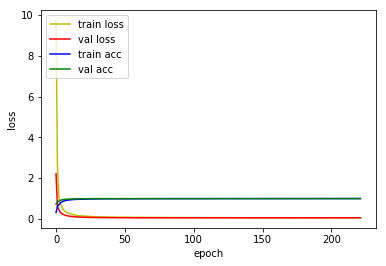

10000/10000 [==============================] - 1s 83us/sample - loss: 0.0342 - acc: 0.9893
Loss: 0.03422784412406909 Accuracy: 0.9893

Train on 40200 samples, validate on 19800 samples
Epoch 1/500
39808/40200 [============================>.] - ETA: 0s - loss: 7.7442 - acc: 0.3067
Epoch 00001: val_loss improved from inf to 0.86643, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_3_conv_checkpoint/001-0.8664.hdf5
40200/40200 [==============================] - 6s 158us/sample - loss: 7.6882 - acc: 0.3083 - val_loss: 0.8664 - val_acc: 0.7110
Epoch 2/500
40000/40200 [============================>.] - ETA: 0s - loss: 1.2664 - acc: 0.6050
Epoch 00002: val_loss improved from 0.86643 to 0.49310, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_3_conv_checkpoint/002-0.4931.hdf5
40200/40200 [==============================] - 5s 127us/sample - loss: 1.2645 - acc: 0.6054 - val_loss: 0.4931 - val_acc: 0.8453
Epoch 3/500
39872/40200 [============================>.

39872/40200 [============================>.] - ETA: 0s - loss: 0.1025 - acc: 0.9680
Epoch 00022: val_loss improved from 0.05929 to 0.05671, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_3_conv_checkpoint/022-0.0567.hdf5
40200/40200 [==============================] - 5s 127us/sample - loss: 0.1026 - acc: 0.9679 - val_loss: 0.0567 - val_acc: 0.9834
Epoch 23/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0951 - acc: 0.9695
Epoch 00023: val_loss improved from 0.05671 to 0.05639, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_3_conv_checkpoint/023-0.0564.hdf5
40200/40200 [==============================] - 5s 118us/sample - loss: 0.0951 - acc: 0.9695 - val_loss: 0.0564 - val_acc: 0.9827
Epoch 24/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0916 - acc: 0.9712
Epoch 00024: val_loss improved from 0.05639 to 0.05539, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_3_conv_checkpoint/024-0.055

Epoch 47/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0501 - acc: 0.9838
Epoch 00047: val_loss did not improve from 0.04183
40200/40200 [==============================] - 5s 116us/sample - loss: 0.0501 - acc: 0.9838 - val_loss: 0.0426 - val_acc: 0.9877
Epoch 48/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0508 - acc: 0.9829
Epoch 00048: val_loss did not improve from 0.04183
40200/40200 [==============================] - 5s 124us/sample - loss: 0.0508 - acc: 0.9828 - val_loss: 0.0429 - val_acc: 0.9871
Epoch 49/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0504 - acc: 0.9840
Epoch 00049: val_loss did not improve from 0.04183
40200/40200 [==============================] - 5s 126us/sample - loss: 0.0501 - acc: 0.9841 - val_loss: 0.0451 - val_acc: 0.9862
Epoch 50/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0477 - acc: 0.9850
Epoch 00050: val_loss did not improve from 0.04183
40200/40200 [========

40192/40200 [============================>.] - ETA: 0s - loss: 0.0335 - acc: 0.9886
Epoch 00075: val_loss did not improve from 0.03931
40200/40200 [==============================] - 5s 127us/sample - loss: 0.0335 - acc: 0.9886 - val_loss: 0.0430 - val_acc: 0.9879
Epoch 76/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0312 - acc: 0.9892
Epoch 00076: val_loss did not improve from 0.03931
40200/40200 [==============================] - 5s 126us/sample - loss: 0.0311 - acc: 0.9892 - val_loss: 0.0415 - val_acc: 0.9884
Epoch 77/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0320 - acc: 0.9891
Epoch 00077: val_loss improved from 0.03931 to 0.03908, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_3_conv_checkpoint/077-0.0391.hdf5
40200/40200 [==============================] - 5s 127us/sample - loss: 0.0320 - acc: 0.9891 - val_loss: 0.0391 - val_acc: 0.9887
Epoch 78/500
40064/40200 [============================>.] - ETA: 0s - loss: 

Epoch 104/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0255 - acc: 0.9915
Epoch 00104: val_loss did not improve from 0.03865
40200/40200 [==============================] - 5s 128us/sample - loss: 0.0254 - acc: 0.9915 - val_loss: 0.0402 - val_acc: 0.9894
Epoch 105/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0283 - acc: 0.9905
Epoch 00105: val_loss did not improve from 0.03865
40200/40200 [==============================] - 5s 126us/sample - loss: 0.0284 - acc: 0.9904 - val_loss: 0.0403 - val_acc: 0.9889
Epoch 106/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0247 - acc: 0.9916
Epoch 00106: val_loss did not improve from 0.03865
40200/40200 [==============================] - 5s 125us/sample - loss: 0.0246 - acc: 0.9916 - val_loss: 0.0409 - val_acc: 0.9889
Epoch 107/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0267 - acc: 0.9907
Epoch 00107: val_loss did not improve from 0.03865
40200/40200 [====

Epoch 134/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0230 - acc: 0.9925
Epoch 00134: val_loss did not improve from 0.03865
40200/40200 [==============================] - 5s 127us/sample - loss: 0.0229 - acc: 0.9925 - val_loss: 0.0411 - val_acc: 0.9889

vis_2D_CNN_custom_ch_16_DO_050_DO_3_conv Model


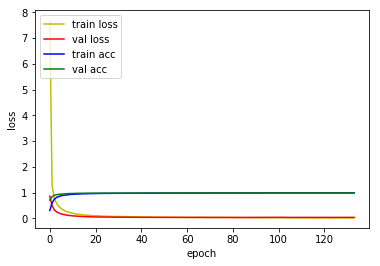

10000/10000 [==============================] - 1s 102us/sample - loss: 0.0297 - acc: 0.9901
Loss: 0.029699888637179175 Accuracy: 0.9901

Train on 40200 samples, validate on 19800 samples
Epoch 1/500
40128/40200 [============================>.] - ETA: 0s - loss: 7.5763 - acc: 0.3043
Epoch 00001: val_loss improved from inf to 1.03362, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_4_conv_checkpoint/001-1.0336.hdf5
40200/40200 [==============================] - 8s 191us/sample - loss: 7.5655 - acc: 0.3046 - val_loss: 1.0336 - val_acc: 0.6720
Epoch 2/500
40128/40200 [============================>.] - ETA: 0s - loss: 1.2018 - acc: 0.6080
Epoch 00002: val_loss improved from 1.03362 to 0.54994, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_4_conv_checkpoint/002-0.5499.hdf5
40200/40200 [==============================] - 6s 144us/sample - loss: 1.2010 - acc: 0.6083 - val_loss: 0.5499 - val_acc: 0.8342
Epoch 3/500
39808/40200 [============================

40128/40200 [============================>.] - ETA: 0s - loss: 0.1077 - acc: 0.9672
Epoch 00022: val_loss improved from 0.07185 to 0.06746, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_4_conv_checkpoint/022-0.0675.hdf5
40200/40200 [==============================] - 6s 143us/sample - loss: 0.1076 - acc: 0.9672 - val_loss: 0.0675 - val_acc: 0.9798
Epoch 23/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.1061 - acc: 0.9672
Epoch 00023: val_loss improved from 0.06746 to 0.06676, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_4_conv_checkpoint/023-0.0668.hdf5
40200/40200 [==============================] - 6s 142us/sample - loss: 0.1058 - acc: 0.9673 - val_loss: 0.0668 - val_acc: 0.9805
Epoch 24/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.1034 - acc: 0.9680
Epoch 00024: val_loss improved from 0.06676 to 0.06374, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_4_conv_checkpoint/024-0.063

Epoch 48/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0497 - acc: 0.9840
Epoch 00048: val_loss did not improve from 0.05089
40200/40200 [==============================] - 5s 131us/sample - loss: 0.0496 - acc: 0.9841 - val_loss: 0.0518 - val_acc: 0.9858
Epoch 49/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0465 - acc: 0.9851
Epoch 00049: val_loss improved from 0.05089 to 0.04948, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_4_conv_checkpoint/049-0.0495.hdf5
40200/40200 [==============================] - 6s 143us/sample - loss: 0.0465 - acc: 0.9851 - val_loss: 0.0495 - val_acc: 0.9853
Epoch 50/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0470 - acc: 0.9845
Epoch 00050: val_loss did not improve from 0.04948
40200/40200 [==============================] - 6s 141us/sample - loss: 0.0468 - acc: 0.9846 - val_loss: 0.0530 - val_acc: 0.9851
Epoch 51/500
39872/40200 [============================>.] - ETA

Epoch 76/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0325 - acc: 0.9896
Epoch 00076: val_loss did not improve from 0.04529
40200/40200 [==============================] - 6s 144us/sample - loss: 0.0325 - acc: 0.9895 - val_loss: 0.0461 - val_acc: 0.9876
Epoch 77/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0292 - acc: 0.9903
Epoch 00077: val_loss did not improve from 0.04529
40200/40200 [==============================] - 6s 143us/sample - loss: 0.0295 - acc: 0.9902 - val_loss: 0.0473 - val_acc: 0.9866
Epoch 78/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0274 - acc: 0.9904
Epoch 00078: val_loss did not improve from 0.04529
40200/40200 [==============================] - 6s 144us/sample - loss: 0.0273 - acc: 0.9905 - val_loss: 0.0462 - val_acc: 0.9870
Epoch 79/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0294 - acc: 0.9903
Epoch 00079: val_loss did not improve from 0.04529
40200/40200 [========

Epoch 106/500
39808/40200 [============================>.] - ETA: 0s - loss: 0.0204 - acc: 0.9930
Epoch 00106: val_loss did not improve from 0.04529
40200/40200 [==============================] - 5s 136us/sample - loss: 0.0203 - acc: 0.9930 - val_loss: 0.0514 - val_acc: 0.9880
Epoch 107/500
40000/40200 [============================>.] - ETA: 0s - loss: 0.0191 - acc: 0.9938
Epoch 00107: val_loss did not improve from 0.04529
40200/40200 [==============================] - 6s 140us/sample - loss: 0.0190 - acc: 0.9939 - val_loss: 0.0482 - val_acc: 0.9880
Epoch 108/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0228 - acc: 0.9924
Epoch 00108: val_loss did not improve from 0.04529
40200/40200 [==============================] - 6s 144us/sample - loss: 0.0228 - acc: 0.9924 - val_loss: 0.0466 - val_acc: 0.9878
Epoch 109/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0191 - acc: 0.9935
Epoch 00109: val_loss did not improve from 0.04529
40200/40200 [====

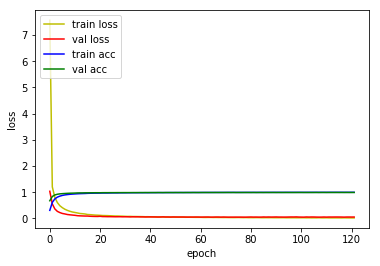

10000/10000 [==============================] - 1s 108us/sample - loss: 0.0383 - acc: 0.9892
Loss: 0.03831109365673383 Accuracy: 0.9892

Train on 40200 samples, validate on 19800 samples
Epoch 1/500
40128/40200 [============================>.] - ETA: 0s - loss: 2.6548 - acc: 0.4303
Epoch 00001: val_loss improved from inf to 0.57933, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_5_conv_checkpoint/001-0.5793.hdf5
40200/40200 [==============================] - 9s 217us/sample - loss: 2.6518 - acc: 0.4308 - val_loss: 0.5793 - val_acc: 0.8361
Epoch 2/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.6304 - acc: 0.7962
Epoch 00002: val_loss improved from 0.57933 to 0.28240, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_5_conv_checkpoint/002-0.2824.hdf5
40200/40200 [==============================] - 6s 152us/sample - loss: 0.6301 - acc: 0.7963 - val_loss: 0.2824 - val_acc: 0.9145
Epoch 3/500
40000/40200 [============================>

Epoch 24/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0477 - acc: 0.9851
Epoch 00024: val_loss did not improve from 0.06322
40200/40200 [==============================] - 6s 161us/sample - loss: 0.0478 - acc: 0.9851 - val_loss: 0.0636 - val_acc: 0.9838
Epoch 25/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0460 - acc: 0.9851
Epoch 00025: val_loss improved from 0.06322 to 0.06135, saving model to model/checkpoint/vis_2D_CNN_custom_ch_16_DO_050_DO_5_conv_checkpoint/025-0.0614.hdf5
40200/40200 [==============================] - 6s 161us/sample - loss: 0.0459 - acc: 0.9851 - val_loss: 0.0614 - val_acc: 0.9843
Epoch 26/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0405 - acc: 0.9878
Epoch 00026: val_loss did not improve from 0.06135
40200/40200 [==============================] - 6s 153us/sample - loss: 0.0404 - acc: 0.9878 - val_loss: 0.0626 - val_acc: 0.9841
Epoch 27/500
40128/40200 [============================>.] - ETA

Epoch 53/500
39872/40200 [============================>.] - ETA: 0s - loss: 0.0150 - acc: 0.9952
Epoch 00053: val_loss did not improve from 0.06050
40200/40200 [==============================] - 7s 163us/sample - loss: 0.0150 - acc: 0.9951 - val_loss: 0.0727 - val_acc: 0.9860
Epoch 54/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0154 - acc: 0.9949
Epoch 00054: val_loss did not improve from 0.06050
40200/40200 [==============================] - 6s 152us/sample - loss: 0.0154 - acc: 0.9949 - val_loss: 0.0693 - val_acc: 0.9870
Epoch 55/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0166 - acc: 0.9949
Epoch 00055: val_loss did not improve from 0.06050
40200/40200 [==============================] - 6s 156us/sample - loss: 0.0166 - acc: 0.9949 - val_loss: 0.0624 - val_acc: 0.9866
Epoch 56/500
40128/40200 [============================>.] - ETA: 0s - loss: 0.0140 - acc: 0.9955
Epoch 00056: val_loss did not improve from 0.06050
40200/40200 [========

Epoch 83/500
40064/40200 [============================>.] - ETA: 0s - loss: 0.0084 - acc: 0.9974
Epoch 00083: val_loss did not improve from 0.06050
40200/40200 [==============================] - 6s 161us/sample - loss: 0.0083 - acc: 0.9974 - val_loss: 0.0751 - val_acc: 0.9879
Epoch 84/500
40192/40200 [============================>.] - ETA: 0s - loss: 0.0074 - acc: 0.9975
Epoch 00084: val_loss did not improve from 0.06050
40200/40200 [==============================] - 6s 160us/sample - loss: 0.0074 - acc: 0.9975 - val_loss: 0.0743 - val_acc: 0.9875
Epoch 85/500
39936/40200 [============================>.] - ETA: 0s - loss: 0.0058 - acc: 0.9979
Epoch 00085: val_loss did not improve from 0.06050
40200/40200 [==============================] - 6s 159us/sample - loss: 0.0058 - acc: 0.9979 - val_loss: 0.0820 - val_acc: 0.9872

vis_2D_CNN_custom_ch_16_DO_050_DO_5_conv Model


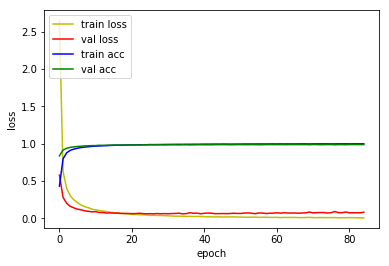

10000/10000 [==============================] - 1s 126us/sample - loss: 0.0522 - acc: 0.9863
Loss: 0.052200128448847 Accuracy: 0.9863



In [11]:
for i in range(1, 6):
    base = 'vis_2D_CNN_custom_ch_16_DO_050_DO'
    model_name = base+'_{}_conv'.format(i)
    model = build_2d_cnn_custom_ch_16_DO(conv_num=i)
#         model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=50)
    hist = model.fit(x_train, y_train, batch_size=64, epochs=500, 
                     validation_data=[x_val, y_val], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model.save(model_path+'000_last.hdf5')
    del(model)

    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [12]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = 'vis_2D_CNN_custom_ch_16_DO_050_DO'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(1, 6):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test, y_test)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


vis_2D_CNN_custom_ch_16_DO_050_DO_1_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
activation_15 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)             

10000/10000 [==============================] - 1s 134us/sample - loss: 0.0522 - acc: 0.9863
Loss: 0.052200128448847 Accuracy: 0.9863


In [13]:
for i in range(1, 6):
    model_name = base+'_{}_conv'.format(i)
    print()
    print(model_name, 'Model')
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + '000_last.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)


vis_2D_CNN_custom_ch_16_DO_050_DO_1_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
activation_15 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)             

10000/10000 [==============================] - 2s 152us/sample - loss: 0.0636 - acc: 0.9891
Loss: 0.06364045939534756 Accuracy: 0.9891
